In [1]:
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel

In [3]:
stardf = pd.read_csv("..//TG_stars.csv")
stardf.head (7)

,Vmag,Plx,e_Plx,B-V,Amag,TargetClass
0,9.10,3.54,1.39,0.482,16.845016,3
1,9.27,21.90,3.10,0.999,20.972221,5
2,6.61,2.81,0.63,-0.019,13.853532,1
3,8.06,7.75,0.97,0.370,17.506509,3
4,8.55,2.87,1.11,0.902,15.839409,4
5,12.31,18.80,4.99,1.336,23.680789,6
6,9.64,17.74,1.30,0.740,20.884768,4


In [4]:
stars_df_features = stardf.copy()

stars_df_features['Amag_SQ'] = stars_df_features['Amag']**2
stars_df_features['Vmag_SQ'] = stars_df_features['Vmag']**2
stars_df_features['B-V_SQ'] = stars_df_features['B-V']**2
stars_df_features['Plx_SQ'] = stars_df_features['Plx']**2


stars_df_features.head()

,Vmag,Plx,e_Plx,B-V,Amag,TargetClass,Amag_SQ,Vmag_SQ,B-V_SQ,Plx_SQ
0,9.10,3.54,1.39,0.482,16.845016,3,283.754574,82.8100,0.232324,12.5316
1,9.27,21.90,3.10,0.999,20.972221,5,439.834036,85.9329,0.998001,479.6100
2,6.61,2.81,0.63,-0.019,13.853532,1,191.920338,43.6921,0.000361,7.8961
3,8.06,7.75,0.97,0.370,17.506509,3,306.477840,64.9636,0.136900,60.0625
4,8.55,2.87,1.11,0.902,15.839409,4,250.886893,73.1025,0.813604,8.2369


In [5]:
X = stars_df_features.drop('TargetClass', axis=1, inplace=False)
y = stars_df_features['TargetClass']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
clf = RandomForestClassifier(random_state=1, n_estimators=500, class_weight='balanced').fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.7512396694214876


[0.06462669 0.07048252 0.06743799 0.25089004 0.08878875 0.08602361
 0.06225925 0.23505892 0.07443223]


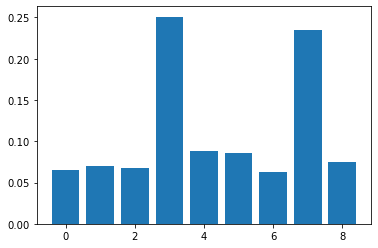

In [12]:
features = clf.feature_importances_
print(features)
plt.bar(x = range(len(features)), height=features)
plt.show()

In [8]:
sel = SelectFromModel(clf)
sel.fit(X_train_scaled, y_train)
sel.get_support()

array([False, False, False,  True, False, False, False,  True, False])

In [13]:
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=1)
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

C:\Users\Helen\anaconda3\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [14]:
clf = LogisticRegression().fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.7634008543475266
Testing Score: 0.7619834710743801


C:\Users\Helen\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
